In [1]:
import numpy as np
from arch import arch_model
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
JPM = yf.download("JPM", start = "2016-01-01", end = "2022-10-07")
JPM.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,63.950001,64.059998,63.009998,63.619999,52.617466,25393200
2016-01-05,63.700001,64.129997,63.040001,63.730000,52.708431,16566700
2016-01-06,62.720001,63.130001,62.340000,62.810001,51.947536,22961500
2016-01-07,61.459999,62.000000,60.080002,60.270000,49.846817,27630900
2016-01-08,61.130001,61.270000,58.849998,58.919998,48.730282,22373300


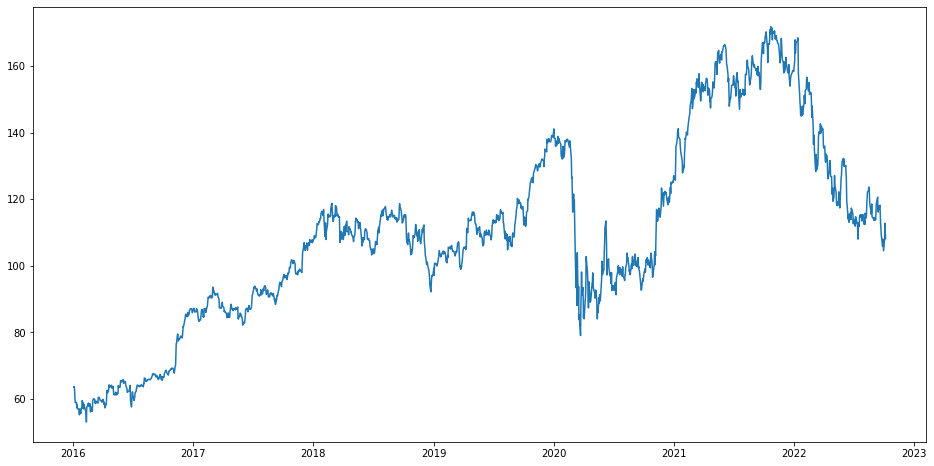

In [3]:
plt.figure(figsize=(16,8))
plt.plot(JPM["Close"])

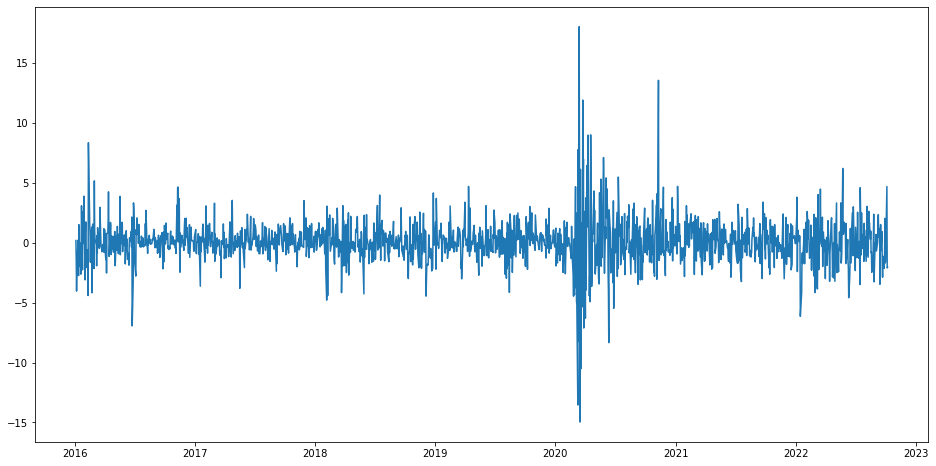

In [25]:
returns = 100 * JPM["Close"].pct_change()[1:]
plt.figure(figsize=(16,8))
plt.plot(returns)

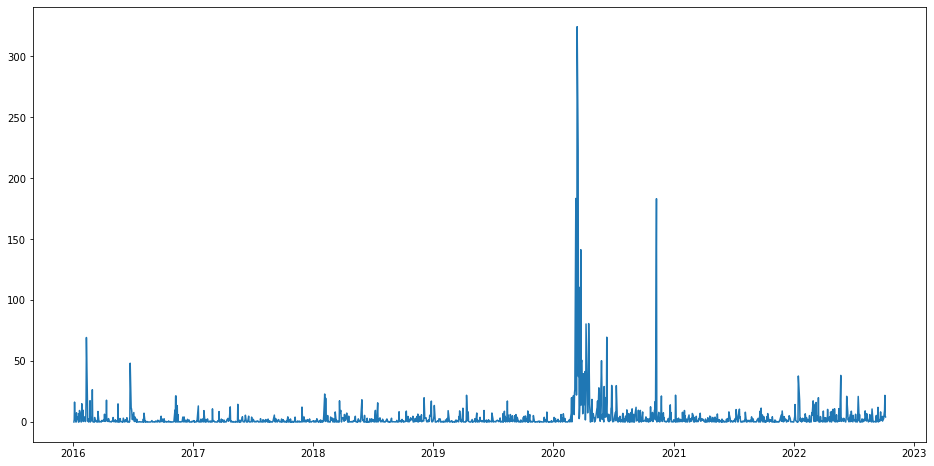

In [26]:
plt.figure(figsize=(16,8))
plt.plot(returns ** 2)

/Users/dehancui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


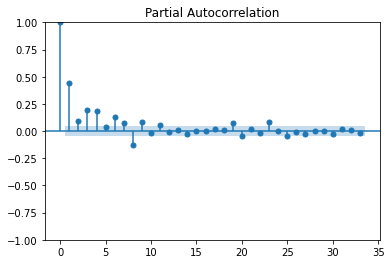

In [27]:
plot_pacf(returns ** 2)
plt.show()

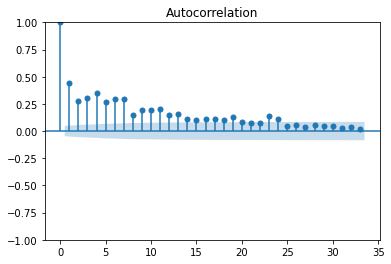

In [28]:
plot_acf(returns ** 2)
plt.show()

/Users/dehancui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


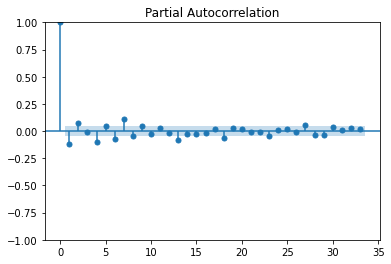

In [29]:
plot_pacf(returns)
plt.show()

In [81]:
model = arch_model(returns, p=1, q=1)

In [82]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 284574.2348398233
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4013487745.499199
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4076.5901589010396
Iteration:      4,   Func. Count:     29,   Neg. LLF: 3313.2681100766513
Iteration:      5,   Func. Count:     36,   Neg. LLF: 3105.685908554119
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3105.435603876543
Iteration:      7,   Func. Count:     47,   Neg. LLF: 3105.4245657170527
Iteration:      8,   Func. Count:     52,   Neg. LLF: 3105.421969283412
Iteration:      9,   Func. Count:     57,   Neg. LLF: 3105.4215761457654
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3105.421431335566
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3105.4214283631254
Iteration:     12,   Func. Count:     71,   Neg. LLF: 3105.421428362952
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3105.4214283631254
            Iterations

In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3105.42
Distribution:                  Normal   AIC:                           6218.84
Method:            Maximum Likelihood   BIC:                           6240.60
                                        No. Observations:                 1702
Date:                Mon, Oct 10 2022   Df Residuals:                     1701
Time:                        23:15:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0874  3.370e-02      2.592  9.539e-03 [2.130e-02,  0.153]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1725  7.124e-02      2.421  1.549e-02 [3.282e-02,  0.312]
alpha[1]       0.1574  4.883e-02      3.224  1.265e-03 [6.172e-02,  0.253]
beta[1]        0.7820  6.451e-02     12.121  8.209e-34   [  0.656,  0.908]
==========================================================================

Covariance estimator: robust
"""

In [106]:
import warnings
warnings.filterwarnings("ignore")

rolling_predictions = []
test_size = 252

for i in range(len(returns)-test_size):
    train = returns[i:test_size+i]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [107]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-1450:])

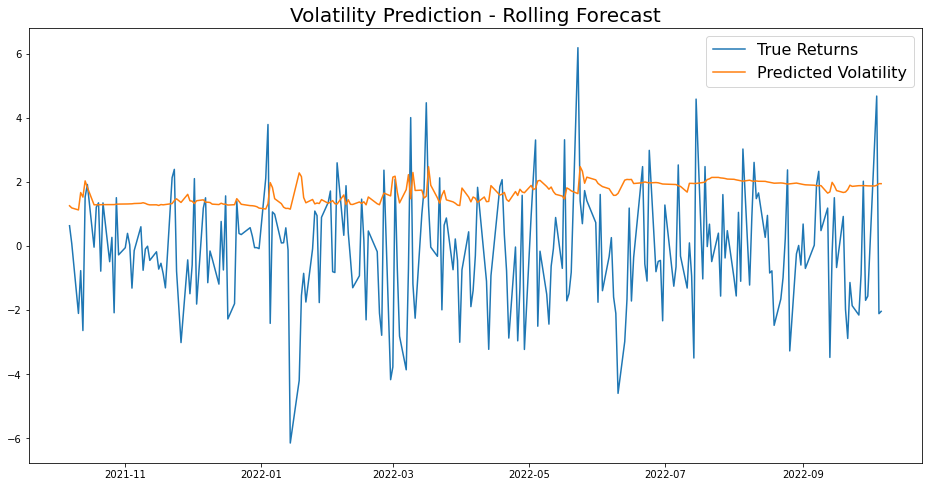

In [111]:
plt.figure(figsize=(16,8))
true, = plt.plot(returns[-252:])
preds, = plt.plot(rolling_predictions[-252:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [87]:
year_v = []

for i in range(252, len(returns)):
    year_v.append(np.std(returns[i-252:i]))


year_v = np.array(year_v)
year_v

array([1.5421943 , 1.54251795, 1.54074317, ..., 1.74786485, 1.77412251,
       1.77690441])

In [88]:
len(year_v), len(rolling_predictions)

(1450, 1450)

In [89]:
rolling_predictions = np.array(rolling_predictions)

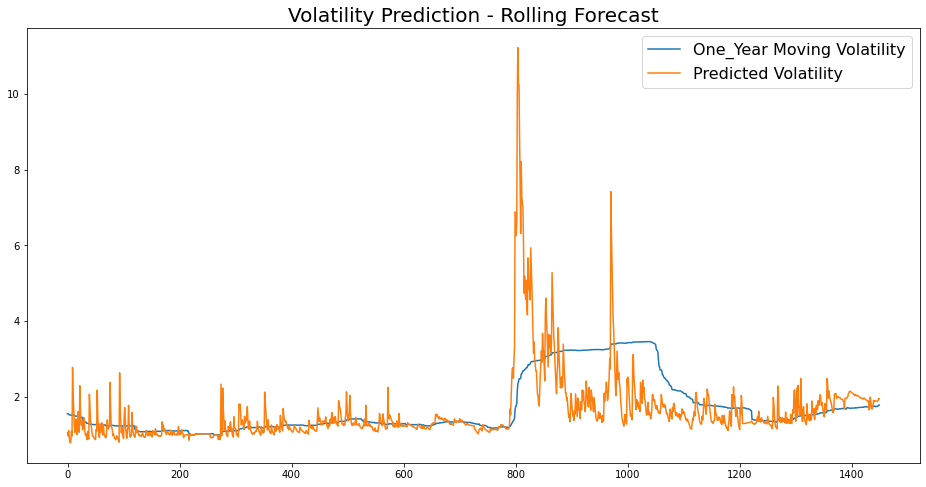

In [90]:
plt.figure(figsize=(16,8))
true, = plt.plot(year_v)
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['One_Year Moving Volatility', 'Predicted Volatility'], fontsize=16)

In [100]:
import warnings
warnings.filterwarnings("ignore")

rolling_predictions = []
test_size = 10

for i in range(len(returns)-test_size):
    train = returns[i:test_size+i]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [102]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-1692:])

In [103]:
weekly_v = []

for i in range(10, len(returns)):
    weekly_v.append(np.std(returns[i-10:i]))

weekly_v = np.array(weekly_v)
weekly_v

array([1.60344824, 1.60535703, 1.62669789, ..., 1.82128209, 2.42408814,
       2.34968382])

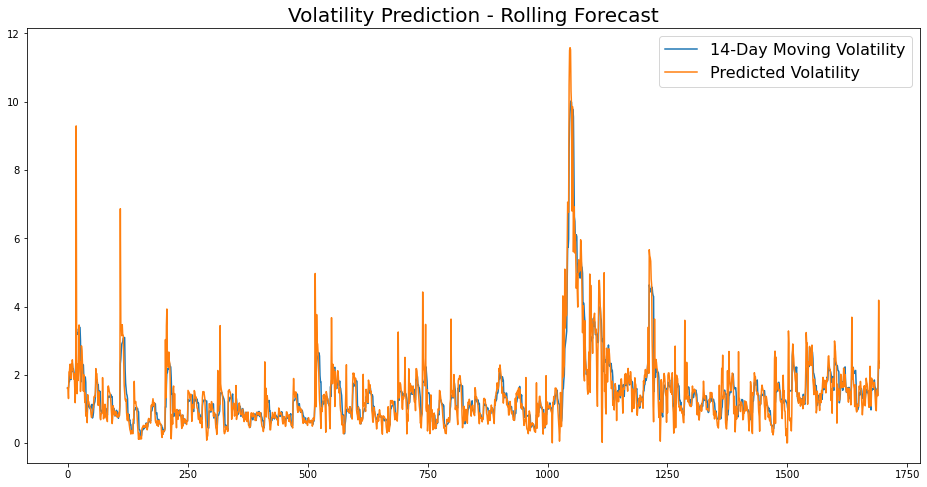

In [104]:
rolling_predictions = np.array(rolling_predictions)

plt.figure(figsize=(16,8))
true, = plt.plot(weekly_v)
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['14-Day Moving Volatility', 'Predicted Volatility'], fontsize=16)